In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
X = dataset.iloc[:, [6,7]].values
Y = dataset.iloc[:, 8].values

In [7]:
X[0:10]

array([[ 0.627, 50.   ],
       [ 0.351, 31.   ],
       [ 0.672, 32.   ],
       [ 0.167, 21.   ],
       [ 2.288, 33.   ],
       [ 0.201, 30.   ],
       [ 0.248, 26.   ],
       [ 0.134, 29.   ],
       [ 0.158, 53.   ],
       [ 0.232, 54.   ]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, train_size = 0.80, random_state = 101)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [11]:
Y_pred = classifier.predict(X_test)

In [12]:
Y_pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[92, 11],
       [41, 10]], dtype=int64)

In [14]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recal:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.6623376623376623
Precision: 0.47619047619047616
Recal: 0.19607843137254902


Text(0.5, 257.44, 'Predicted label')

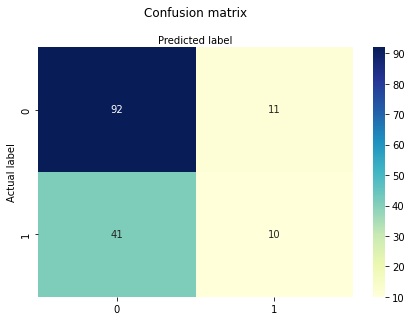

In [15]:
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 65.625% (3.267%)


In [17]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 64.973% (5.343%)
